<a href="https://colab.research.google.com/github/Ryan-spec/Portfolio-Projects/blob/master/Trading_Using_MFI_and_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Trading Using Money Flow Index and Python**

---



In [ ]:
# Using Money Flow Index to determine when to buy and sell stocks

In [1]:
# Import the libraries
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
warnings.filterwarnings('ignore')

In [2]:
# Load the Amazon stock data
from google.colab import files
files.upload()

Saving AMZN.csv to AMZN.csv


{'AMZN.csv': b'Date,Open,High,Low,Close,Adj Close,Volume\n2019-10-14,1728.910034,1741.890015,1722.000000,1736.430054,1736.430054,1910200\n2019-10-15,1742.140015,1776.449951,1740.619995,1767.380005,1767.380005,3111700\n2019-10-16,1773.329956,1786.239990,1770.520020,1777.430054,1777.430054,2763400\n2019-10-17,1796.489990,1798.849976,1782.020020,1787.479980,1787.479980,2647400\n2019-10-18,1787.800049,1793.979980,1749.199951,1757.510010,1757.510010,3362500\n2019-10-21,1769.660034,1785.880005,1765.000000,1785.660034,1785.660034,2130400\n2019-10-22,1788.150024,1789.780029,1762.000000,1765.729980,1765.729980,2111700\n2019-10-23,1761.300049,1770.050049,1742.000000,1762.170044,1762.170044,2138200\n2019-10-24,1771.089966,1788.339966,1760.270020,1780.780029,1780.780029,4446100\n2019-10-25,1697.550049,1764.209961,1695.000000,1761.329956,1761.329956,9626400\n2019-10-28,1748.060059,1778.699951,1742.500000,1777.079956,1777.079956,3708900\n2019-10-29,1774.810059,1777.000000,1755.810059,1762.709961,176

In [3]:
# Store the data into a variable
df = pd.read_csv('AMZN.csv')

# View the first five rows
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-14,1728.910034,1741.890015,1722.000000,1736.430054,1736.430054,1910200
1,2019-10-15,1742.140015,1776.449951,1740.619995,1767.380005,1767.380005,3111700
2,2019-10-16,1773.329956,1786.239990,1770.520020,1777.430054,1777.430054,2763400
3,2019-10-17,1796.489990,1798.849976,1782.020020,1787.479980,1787.479980,2647400
4,2019-10-18,1787.800049,1793.979980,1749.199951,1757.510010,1757.510010,3362500


In [4]:
# Get the rows and columns 
df.shape

(251, 7)

In [5]:
# Set the index to the date column
df = df.set_index(pd.DatetimeIndex(df['Date'].values))
df

,Date,Open,High,Low,Close,Adj Close,Volume
2019-10-14,2019-10-14,1728.910034,1741.890015,1722.000000,1736.430054,1736.430054,1910200
2019-10-15,2019-10-15,1742.140015,1776.449951,1740.619995,1767.380005,1767.380005,3111700
2019-10-16,2019-10-16,1773.329956,1786.239990,1770.520020,1777.430054,1777.430054,2763400
2019-10-17,2019-10-17,1796.489990,1798.849976,1782.020020,1787.479980,1787.479980,2647400
2019-10-18,2019-10-18,1787.800049,1793.979980,1749.199951,1757.510010,1757.510010,3362500
...,...,...,...,...,...,...,...
2020-10-05,2020-10-05,3145.840088,3202.530029,3140.850098,3199.199951,3199.199951,3775300
2020-10-06,2020-10-06,3165.000000,3182.000000,3090.000000,3099.959961,3099.959961,5086900
2020-10-07,2020-10-07,3135.000000,3200.000000,3132.389893,3195.689941,3195.689941,4309400
2020-10-08,2020-10-08,3224.989990,3233.290039,3174.989990,3190.550049,3190.550049,3174100


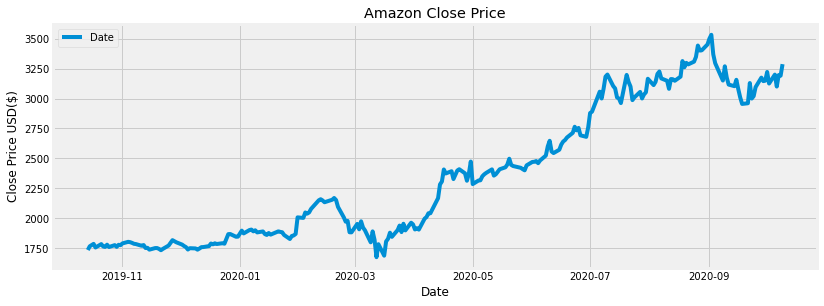

In [6]:
# Visualize the data
plt.figure(figsize=(12.2, 4.5))
plt.plot(df['Close'], label = 'Close Price')
plt.title('Amazon Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.legend(df.columns.values, loc= 'upper left')
plt.show()

In [12]:
# Calculate the typical price
typical_price = (df['Close'] + df['High'] + df['Low']) / 3
typical_price

2019-10-14    1733.440023
2019-10-15    1761.483317
2019-10-16    1778.063355
2019-10-17    1789.449992
2019-10-18    1766.896647
                 ...     
2020-10-05    3180.860026
2020-10-06    3123.986654
2020-10-07    3176.026611
2020-10-08    3199.610026
2020-10-09    3257.823323
Length: 251, dtype: float64

In [13]:
# Get the period which is usually 14 days for MFI
period = 14

In [14]:
# Calculate the money flow
money_flow = typical_price * df['Volume']
money_flow

2019-10-14    3.311217e+09
2019-10-15    5.481208e+09
2019-10-16    4.913500e+09
2019-10-17    4.737390e+09
2019-10-18    5.941190e+09
                  ...     
2020-10-05    1.200870e+10
2020-10-06    1.589141e+10
2020-10-07    1.368677e+10
2020-10-08    1.015588e+10
2020-10-09    1.594705e+10
Length: 251, dtype: float64

In [15]:
# Get all the positive and negative money flows 
positive_flow = []
negative_flow = []

# Loop through the typical price 
for i in range(1, len(typical_price)):
  if typical_price[i] > typical_price[i-1]:
    positive_flow.append(money_flow[i-1])
    negative_flow.append(0)
  elif typical_price[i] < typical_price[i-1]:
    negative_flow.append(money_flow[i-1])
    positive_flow.append(0)
  else:
    positive_flow.append(0)
    negative_flow.append(0)


In [16]:
# Get all the positive and negative money flows within the 14days
positive_mf = []
negative_mf = []

for i in range(period-1, len(positive_flow)):
  positive_mf.append(sum(positive_flow[i + 1 - period : i + 1]))
for i in range(period-1, len(negative_flow)):
  negative_mf.append(sum(negative_flow[i + 1 - period : i + 1]))

In [17]:
# Calculate the money flow index
mfi = 100 * (np.array(positive_mf) / (np.array(positive_mf) + np.array(negative_mf)))
mfi

array([66.68131068, 67.36796626, 61.02591654, 56.03351081, 56.81050149,
       50.02553932, 50.02763099, 54.67972073, 49.90449593, 51.67298318,
       35.23660026, 35.06507232, 36.0237718 , 29.29697355, 21.4181117 ,
       20.94757274, 28.20289326, 36.58176978, 44.04107176, 43.5585207 ,
       43.75918933, 36.64008735, 43.66993356, 43.99152044, 50.17232554,
       58.76198003, 52.339776  , 58.18078854, 64.40436623, 64.81154005,
       65.06780018, 64.76616972, 65.16643997, 64.70959829, 70.05010814,
       67.99301089, 67.06302706, 72.30289782, 74.52833295, 62.37771983,
       60.51978463, 60.63248916, 53.86972241, 54.69066575, 56.05852397,
       49.02411294, 49.09904988, 49.07844244, 49.42238767, 51.53227079,
       46.11884766, 48.19270587, 39.45621179, 49.67918792, 57.4099244 ,
       51.39171993, 53.1032279 , 45.07676316, 44.3019444 , 51.7987023 ,
       50.15993217, 60.3912161 , 41.69977894, 49.32213113, 56.28890358,
       50.48983154, 54.93229893, 55.98289608, 57.19027162, 63.36

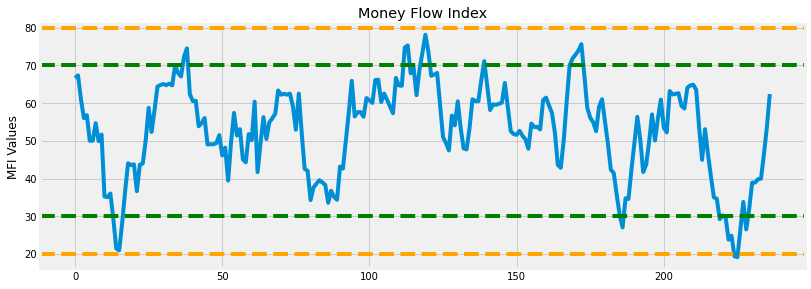

In [24]:
# Visualize the MFI
df2 = pd.DataFrame()
df2['MFI'] = mfi

# Create the plot
plt.figure(figsize=(12.2, 4.5))
plt.plot(df2['MFI'], label = 'MFI')
plt.axhline(20, linestyle= '--', color = 'orange')
plt.axhline(30, linestyle= '--', color = 'green')
plt.axhline(70, linestyle= '--', color = 'green')
plt.axhline(80, linestyle= '--', color = 'orange')
plt.title('Money Flow Index')
plt.ylabel('MFI Values')
plt.show()

In [25]:
# Create a new dataframe
new_df = pd.DataFrame()
new_df = df[period:]
new_df['MFI'] = mfi

new_df

,Date,Open,High,Low,Close,Adj Close,Volume,MFI
2019-11-01,2019-11-01,1788.010010,1797.449951,1785.209961,1791.439941,1791.439941,2790400,66.681311
2019-11-04,2019-11-04,1801.010010,1815.060059,1801.010010,1804.660034,1804.660034,2771900,67.367966
2019-11-05,2019-11-05,1809.160034,1810.250000,1794.000000,1801.709961,1801.709961,1885500,61.025917
2019-11-06,2019-11-06,1801.000000,1802.500000,1788.579956,1795.770020,1795.770020,2029800,56.033511
2019-11-07,2019-11-07,1803.760010,1805.900024,1783.479980,1788.199951,1788.199951,2651100,56.810501
...,...,...,...,...,...,...,...,...
2020-10-05,2020-10-05,3145.840088,3202.530029,3140.850098,3199.199951,3199.199951,3775300,39.833811
2020-10-06,2020-10-06,3165.000000,3182.000000,3090.000000,3099.959961,3099.959961,5086900,39.944377
2020-10-07,2020-10-07,3135.000000,3200.000000,3132.389893,3195.689941,3195.689941,4309400,46.407597
2020-10-08,2020-10-08,3224.989990,3233.290039,3174.989990,3190.550049,3190.550049,3174100,53.542582


In [26]:
# Create a function to get the buy and sell signals
def get_signal(data, high, low):
  buy_signal = []
  sell_signal = []

  for i in range(len(data['MFI'])):
    if data['MFI'][i] > high:
      buy_signal.append(np.nan)
      sell_signal.append(data['Close'][i])
    elif data['MFI'][i] < low:
      buy_signal.append(data['Close'][i])
      sell_signal.append(np.nan)
    else:
      buy_signal.append(np.nan)
      sell_signal.append(np.nan)

  return (buy_signal, sell_signal)
 


In [30]:
# Add new columns(Buy & Sell)
new_df['Buy'] = get_signal(new_df, 70, 30)[0]
new_df['Sell'] = get_signal(new_df, 70, 30)[1]

# Show the data
new_df

,Date,Open,High,Low,Close,Adj Close,Volume,MFI,Buy,Sell
2019-11-01,2019-11-01,1788.010010,1797.449951,1785.209961,1791.439941,1791.439941,2790400,66.681311,NaN,NaN
2019-11-04,2019-11-04,1801.010010,1815.060059,1801.010010,1804.660034,1804.660034,2771900,67.367966,NaN,NaN
2019-11-05,2019-11-05,1809.160034,1810.250000,1794.000000,1801.709961,1801.709961,1885500,61.025917,NaN,NaN
2019-11-06,2019-11-06,1801.000000,1802.500000,1788.579956,1795.770020,1795.770020,2029800,56.033511,NaN,NaN
2019-11-07,2019-11-07,1803.760010,1805.900024,1783.479980,1788.199951,1788.199951,2651100,56.810501,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2020-10-05,2020-10-05,3145.840088,3202.530029,3140.850098,3199.199951,3199.199951,3775300,39.833811,NaN,NaN
2020-10-06,2020-10-06,3165.000000,3182.000000,3090.000000,3099.959961,3099.959961,5086900,39.944377,NaN,NaN
2020-10-07,2020-10-07,3135.000000,3200.000000,3132.389893,3195.689941,3195.689941,4309400,46.407597,NaN,NaN
2020-10-08,2020-10-08,3224.989990,3233.290039,3174.989990,3190.550049,3190.550049,3174100,53.542582,NaN,NaN


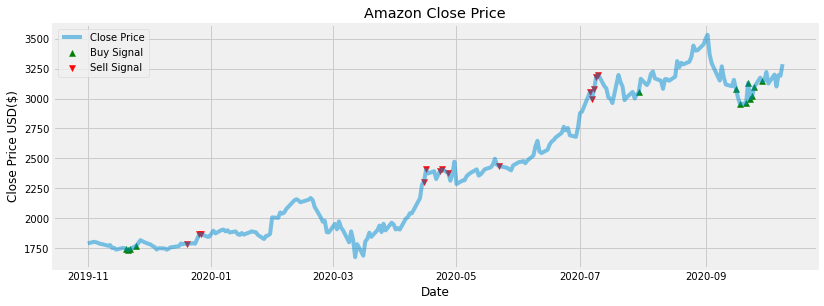

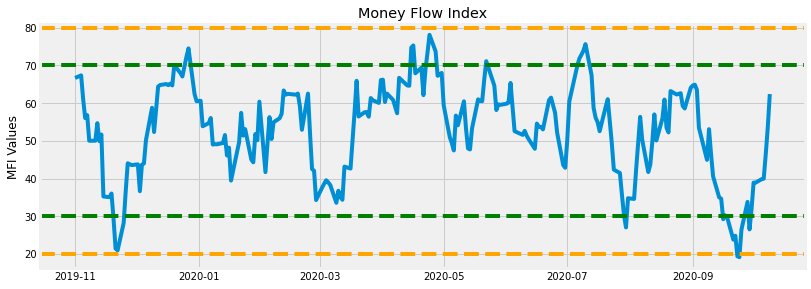

In [32]:
# Plot the data
plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df['Close'], label = 'Close Price', alpha=0.5)
plt.scatter(new_df.index, new_df['Buy'], color= 'green', label= 'Buy Signal', marker='^', alpha=1)
plt.scatter(new_df.index, new_df['Sell'], color= 'red', label= 'Sell Signal', marker='v', alpha=1)
plt.title('Amazon Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price USD($)')
plt.legend(loc= 'upper left')
plt.show()

plt.figure(figsize=(12.2, 4.5))
plt.plot(new_df['MFI'], label = 'MFI')
plt.axhline(20, linestyle= '--', color = 'orange')
plt.axhline(30, linestyle= '--', color = 'green')
plt.axhline(70, linestyle= '--', color = 'green')
plt.axhline(80, linestyle= '--', color = 'orange')
plt.title('Money Flow Index')
plt.ylabel('MFI Values')
plt.show()

Our Buy and Sell signals correlate to the visualization which is an indication that the program performed well!

---

